# Infinite-horizon Discrete-time LQR

Consider the simple controlled double integrator system:
\begin{equation}
\ddot{x} = u.
\end{equation}
We can write this as a state space model with:
\begin{equation}
\begin{bmatrix}\dot{x}_1 \\ \dot{x}_2 \end{bmatrix} =
\begin{bmatrix}0 & 1 \\ 0 & 0\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} +
\begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix}u\end{bmatrix}.
\end{equation}

Our goal is to compute a control law to minimize the infinite-horizon quadratic regulation cost:

\begin{equation}
J(\mathbf{x}(t), u(t)) = \int_0^{\infty} \mathbf{x}(t)^\top Q\mathbf{x}(t)+ \mathbf{u}(t)^\top R \mathbf{u}(t) dt
\end{equation}

In [1]:
import numpy as np
from scipy.linalg import solve_continuous_are

# System dynamics matrices for simple double integrator ẍ = u
A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])

# Define cost function matrices
Q = np.array([[1, 0], [0, 1]])
R = np.array([[1]])

# Solve the continuous algebraic Riccati equation
P = solve_continuous_are(A, B, Q, R)

# Compute optimal feedback gain matrix
K = -np.linalg.inv(R) @ B.T @ P

# Verify eigenvalues are negative (closed-loop system is stable)
eig_val, eig_vec = np.linalg.eig(A + B @ K)
print(eig_val)

[-0.8660254+0.5j -0.8660254-0.5j]


We can now simulate the closed-loop system:

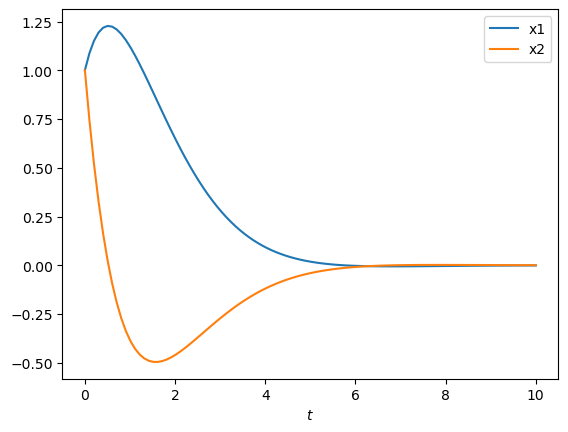

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
x0 = np.array([1, 1.])

# Use odeint to simulate the dynamics
T = 10
t = np.linspace(0, T, num=100)
x_traj = odeint(lambda x, t : (A + B @ K) @ x, x0, t)
x1_traj, x2_traj = x_traj.T

# Plot results
plt.plot(t, x1_traj, label="x1")
plt.plot(t, x2_traj, label="x2")
plt.xlabel(r'$t$')
plt.legend()
plt.show()